##Import Required libraries

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
np.random.seed(42)

##Load the Dataset

In [47]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


##Select the Features for Clustering

In [48]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


##Feature Scaling

In [49]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##Eblow method (Interia K=2-10)

In [50]:
inertia_values = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(
        n_clusters=k,
        init='k-means++',
        n_init=10,
        max_iter=300,
        random_state=42
    )
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

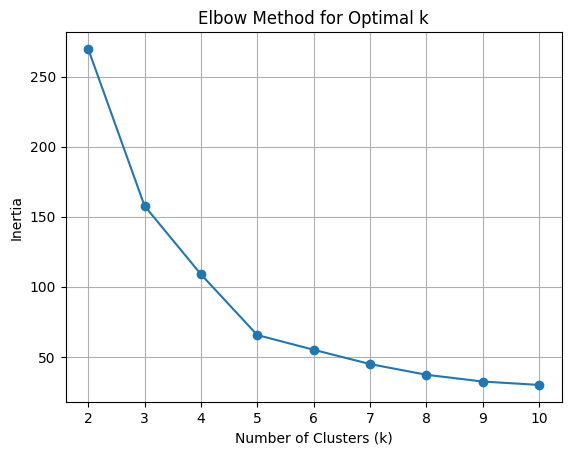

In [51]:
plt.figure()
plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.savefig("figures/elbow_method.png", dpi=300)
plt.show()


##Silhouette Score Analysis

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

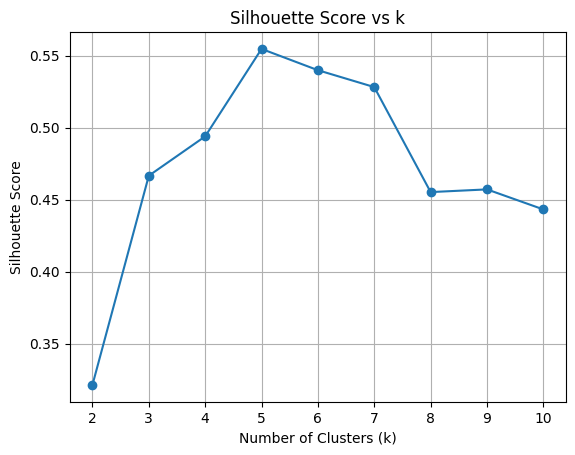

In [52]:
silhouette_scores = []
for k in k_range:
    kmeans = KMeans(
        n_clusters=k,
        init='k-means++',
        n_init=10,
        max_iter=300,
        random_state=42
    )
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    plt.figure()
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.grid(True)
plt.savefig("figures/silhouette_scores.png", dpi=300)
plt.show()

##Visualising Clusters for Selected k Values

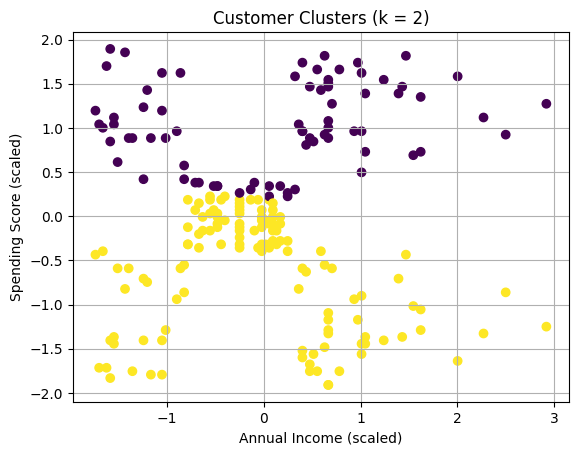

In [53]:
#where k=2(Under-clustering)
kmeans_2 = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=42)
labels_2 = kmeans_2.fit_predict(X_scaled)
plt.figure()
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_2)
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('Customer Clusters (k = 2)')
plt.grid(True)
plt.savefig("figures/clusters_k2.png", dpi=300)
plt.show()

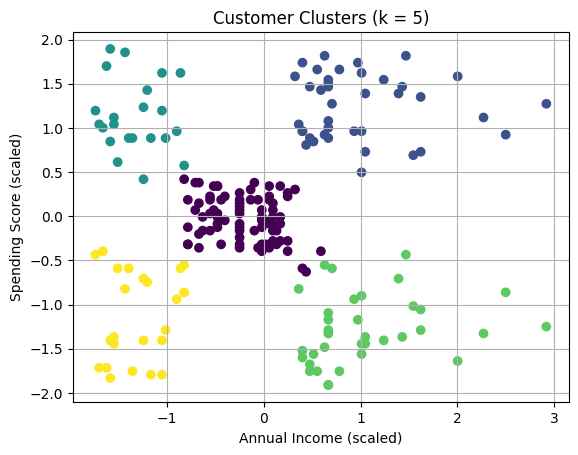

In [54]:
#where k=5 (Optimal Clustering)
kmeans_5 = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42)
labels_5 = kmeans_5.fit_predict(X_scaled)
plt.figure()
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_5)
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('Customer Clusters (k = 5)')
plt.grid(True)
plt.savefig("figures/clusters_k5.png", dpi=300)
plt.show()


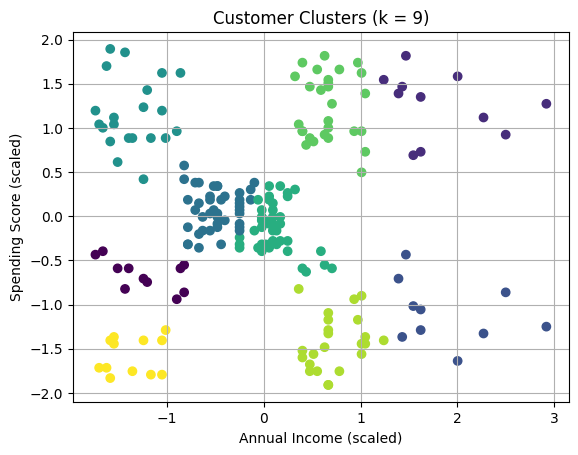

In [55]:
#where k=9(Over-Clustering)
kmeans_9 = KMeans(n_clusters=9, init='k-means++', n_init=10, random_state=42)
labels_9 = kmeans_9.fit_predict(X_scaled)
plt.figure()
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_9)
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('Customer Clusters (k = 9)')
plt.grid(True)
plt.savefig("figures/clusters_k9.png", dpi=300)
plt.show()

##Raw Data vs Scaled Data

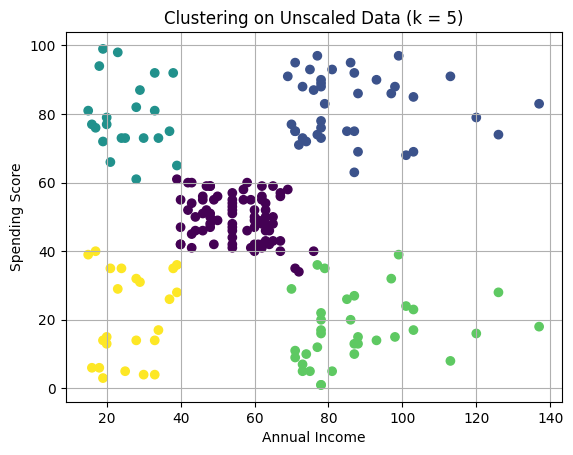

In [56]:
kmeans_raw = KMeans(n_clusters=5, random_state=42)
raw_labels = kmeans_raw.fit_predict(X)
plt.figure()
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=raw_labels)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Clustering on Unscaled Data (k = 5)')
plt.grid(True)
plt.savefig("figures/raw_vs_scaled.png", dpi=300)
plt.show()

In [57]:
final_kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42)
final_labels = final_kmeans.fit_predict(X_scaled)
data['Cluster'] = final_labels
data.head()
data.to_csv("data/mall_customers_with_clusters.csv", index=False)

In [58]:
data.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


##k-Means++ vs Random initialisation comparison

In [59]:
#k-Means++ vs Random Initialisation
kmeans_random = KMeans(n_clusters=5, init='random', n_init=10, random_state=42)
kmeans_pp = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42)
labels_random = kmeans_random.fit_predict(X_scaled)
labels_pp = kmeans_pp.fit_predict(X_scaled)
sil_random = silhouette_score(X_scaled, labels_random)
sil_pp = silhouette_score(X_scaled, labels_pp)
print("Silhouette Score (Random Init):", sil_random)
print("Silhouette Score (k-Means++ Init):", sil_pp)

Silhouette Score (Random Init): 0.5546571631111091
Silhouette Score (k-Means++ Init): 0.5546571631111091


## Summary
In this notebook, we applied K-Means clustering to the Mall Customers dataset, explored different cluster numbers using the elbow method, and visualised the resulting clusters. All steps are fully reproducible, with fixed seeds and clear explanations.
